In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_bokeh

In [24]:
!pip install bokeh

In [27]:
import bokeh
print(bokeh.__version__)
print(pandas_bokeh.__version__)

2.4.2
0.5.5


In [13]:
pandas_bokeh.output_notebook()

Loading BokehJS ...

In [8]:
GRD_sheet = pd.read_excel("Datos.xls", sheet_name = "GRD", header = 0, index_col = None)
Hosp_sheet = pd.read_excel("Datos.xls", sheet_name = "Hospitales", header = 0, index_col = None)
Info_sheet = pd.read_excel("Datos.xls", sheet_name = "Información Histórica", header = 0, index_col = None)

In [9]:
GRD_sheet.head()

,ID GRD,Nombre GRD,Costo resolución en Clínica Privada [MM$]
0,GRD1,Coronario,7.917
1,GRD2,Hepático,3.417
2,GRD3,Respiratorio,2.915
3,GRD4,Renal,6.188
4,GRD5,Neurológico,6.782


In [10]:
Hosp_sheet.head()

,Nombre Servicio de Salud,Nombre Establecimiento,Área Cuidados Intensivos Adultos,Área Cuidados Intermedios Adulto,Total Camas Críticas,Máxima cantidad de camas a aumetar,Costo de instalar una cama [MM$],Costo de operación anual de una cama [MM$],Costo diario GRD1 [MM$],Costo diario GRD2 [MM$],Costo diario GRD3 [MM$],Costo diario GRD4 [MM$],Costo diario GRD5 [MM$],Costo diario GRD6 [MM$],Costo diario GRD7 [MM$],Costo diario GRD8 [MM$],Costo diario GRD9 [MM$],Costo diario GRD10 [MM$]
0,Metropolitano Norte ...,Complejo Hospitalario San José,11,33,44,10,1407,47.2,0.593,0.509,0.367,0.492,0.524,0.405,0.571,0.474,0.498,0.305
1,Metropolitano Occidente ...,Hospital Adalberto Steeger (Talagante),6,11,17,5,1263,62.1,0.493,0.357,0.429,0.382,0.469,0.386,0.543,0.362,0.564,0.333
2,Metropolitano Occidente ...,Hospital Dr. Félix Bulnes Cerda,3,6,9,5,1310,65.9,0.580,0.325,0.375,0.409,0.561,0.362,0.328,0.314,0.536,0.436
3,Metropolitano Occidente ...,Hospital San Juan de Dios,29,47,76,30,1066,39.2,0.482,0.554,0.564,0.331,0.438,0.509,0.544,0.410,0.441,0.359
4,Metropolitano Occidente ...,Instituto Traumatológico Dr. Teodoro Gebauer,12,6,18,5,1433,55.5,0.407,0.449,0.468,0.433,0.573,0.392,0.409,0.391,0.418,0.334


In [12]:
Info_sheet.head()

,Número de llegada,Hospital al que llega,GRD,Día de llegada,Día de salida,Estadia
0,1,Instituto Traumatológico Dr. Teodoro Gebauer,GRD3,1,4,3
1,2,Hospital Clínico San Borja-Arriarán,GRD7,1,5,4
2,3,Hospital Dr. Luis Tisné B.,GRD7,1,5,4
3,4,Hospital Dr. Exequiel González Cortés,GRD10,1,11,10
4,5,Hospital Barros Luco Trudeau,GRD6,1,6,5


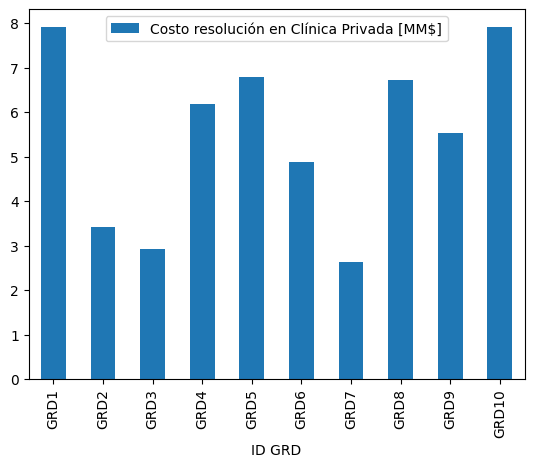

In [14]:
GRD_sheet.plot(kind='bar',x='ID GRD',y='Costo resolución en Clínica Privada [MM$]')
plt.show()

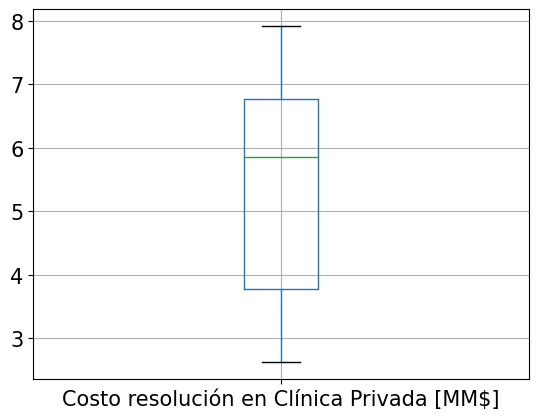

In [17]:
GRD_sheet.boxplot(fontsize=15)
plt.show()

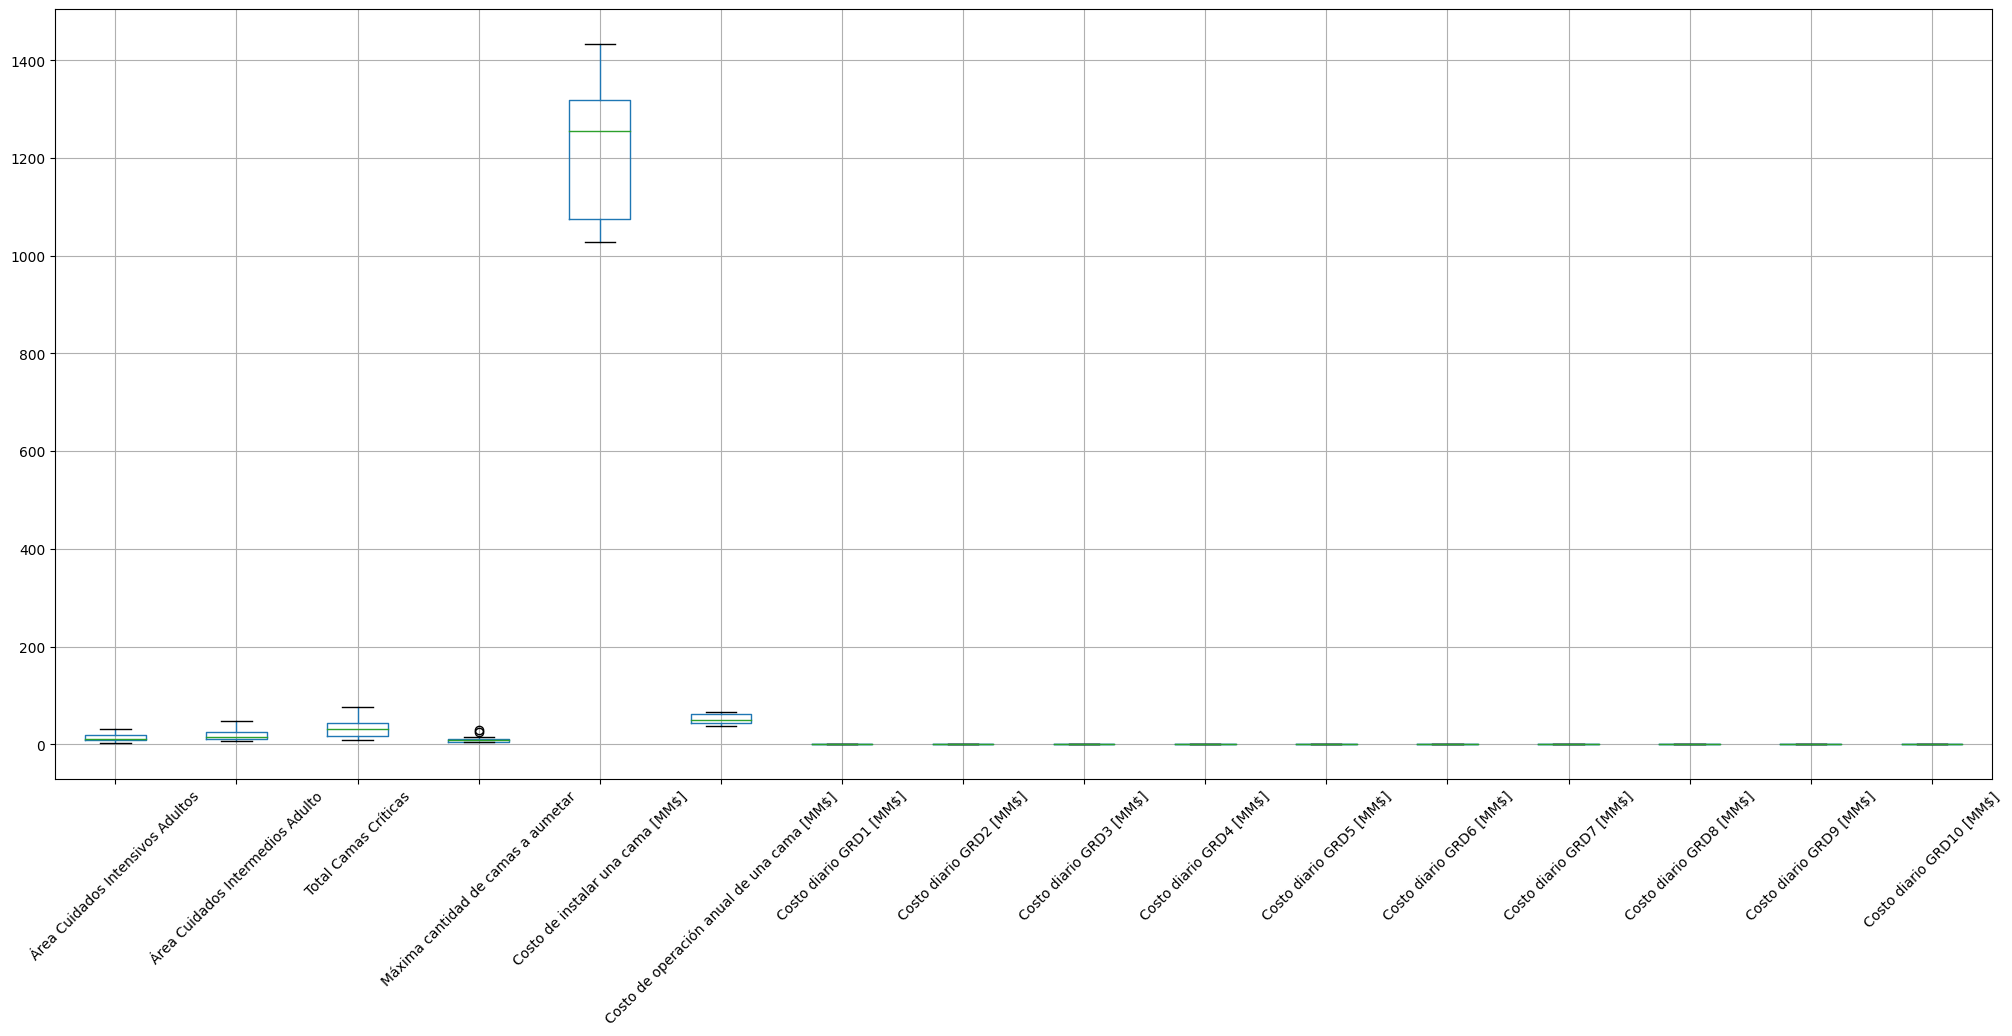

In [18]:
Hosp_sheet.boxplot(rot=45, figsize=(25,10))
plt.show()

<AxesSubplot: xlabel='Nombre Establecimiento'>

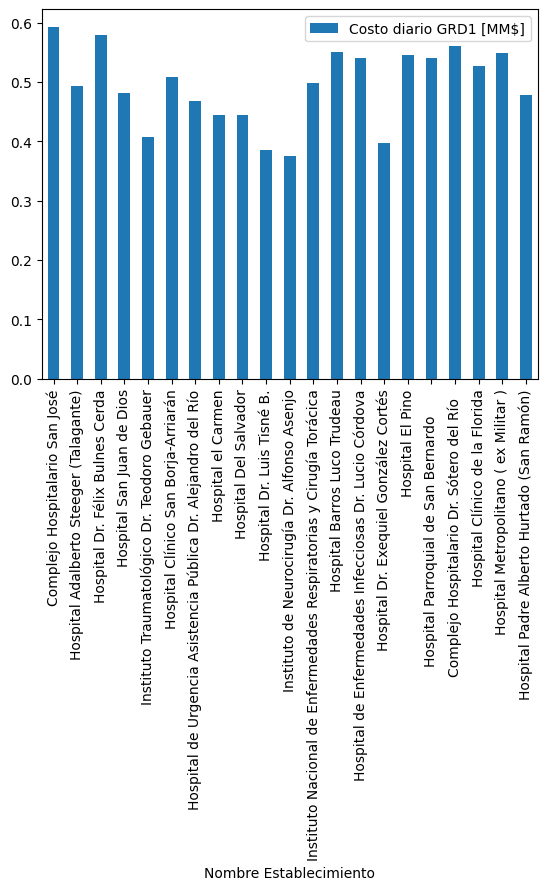

In [19]:
Hosp_sheet[['Nombre Establecimiento', 'Costo diario GRD1 [MM$]']].plot(kind='bar', x='Nombre Establecimiento', y=plt.show())

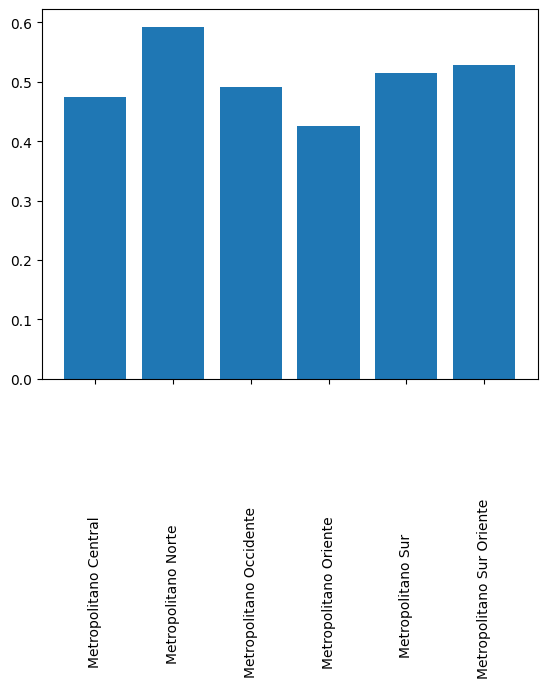

In [42]:
grouped=Hosp_sheet[['Nombre Servicio de Salud', 'Costo diario GRD1 [MM$]']].groupby('Nombre Servicio de Salud').mean()
plt.bar(grouped.index, grouped['Costo diario GRD1 [MM$]'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
p_pie=Info_sheet[['Número de llegada','GRD']].groupby('GRD').count().plot_bokeh.pie(show_figure=False)
p_line=Info_sheet[['Número de llegada', 'Día de llegada']].groupby('Día de llegada').count().plot_bokeh(kind='line')
pandas_bokeh.plot_grid([[p_line,p_pie]], width=450)

In [17]:
promedio=GRD_sheet['Costo resolución en Clínica Privada [MM$]'].mean()
print(f'Promedio de costo de resoluciónes de {np.round(promedio,2)} [MM$]')

Promedio de costo de resoluciónes de 5.49 [MM$]


In [18]:
prom_hosp=Hosp_sheet.groupby('Nombre Servicio de Salud').mean()
prom_hosp.head()

C:\Users\raul\AppData\Local\Temp\ipykernel_33088\2434396993.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prom_hosp=Hosp_sheet.groupby('Nombre Servicio de Salud').mean()


,Área Cuidados Intensivos Adultos,Área Cuidados Intermedios Adulto,Total Camas Críticas,Máxima cantidad de camas a aumetar,Costo de instalar una cama [MM$],Costo de operación anual de una cama [MM$],Costo diario GRD1 [MM$],Costo diario GRD2 [MM$],Costo diario GRD3 [MM$],Costo diario GRD4 [MM$],Costo diario GRD5 [MM$],Costo diario GRD6 [MM$],Costo diario GRD7 [MM$],Costo diario GRD8 [MM$],Costo diario GRD9 [MM$],Costo diario GRD10 [MM$]
Nombre Servicio de Salud,,,,,,,,,,,,,,,,
Metropolitano Central,15.666667,19.333333,35.00,8.00,1323.666667,52.433333,0.473667,0.43700,0.434667,0.49800,0.38700,0.462333,0.4450,0.435667,0.381333,0.522333
Metropolitano Norte,11.000000,33.000000,44.00,10.00,1407.000000,47.200000,0.593000,0.50900,0.367000,0.49200,0.52400,0.405000,0.5710,0.474000,0.498000,0.305000
Metropolitano Occidente,12.500000,17.500000,30.00,11.25,1268.000000,55.675000,0.490500,0.42125,0.459000,0.38875,0.51025,0.412250,0.4560,0.369250,0.489750,0.365500
Metropolitano Oriente,14.250000,20.000000,34.25,10.75,1202.250000,50.300000,0.426000,0.44050,0.448500,0.44375,0.52000,0.396250,0.4030,0.470500,0.423500,0.430750
Metropolitano Sur,16.600000,18.000000,34.60,9.60,1188.200000,53.900000,0.515200,0.44680,0.542800,0.43900,0.51900,0.403800,0.3892,0.515200,0.489000,0.383600


In [19]:
prom_historica=Info_sheet[['Hospital al que llega','Estadia']].groupby('Hospital al que llega').mean()
prom_historica.head()

,Estadia
Hospital al que llega,
Complejo Hospitalario Dr. Sótero del Río,5.430255
Complejo Hospitalario San José,5.507094
Hospital Adalberto Steeger (Talagante),5.376607
Hospital Barros Luco Trudeau,5.466349
Hospital Clínico San Borja-Arriarán,5.497654


**Pregunta 1**

¿Cuál código permite construir una “línea que represente la tendencia al alza” que poseen los datos de las llegadas diarias si se cuenta con un DataFrame como el presentado?


grafico.plot(kind=”bar”)


sns.lmplot(x='Número de llegada', y='Día de llegada', data=grafico, height = 7, aspect = 2)


sns.lmplot(x='Día de llegada', y='Número de llegada', data=grafico, height = 7, aspect = 2)


grafico.plot(kind=”line”)



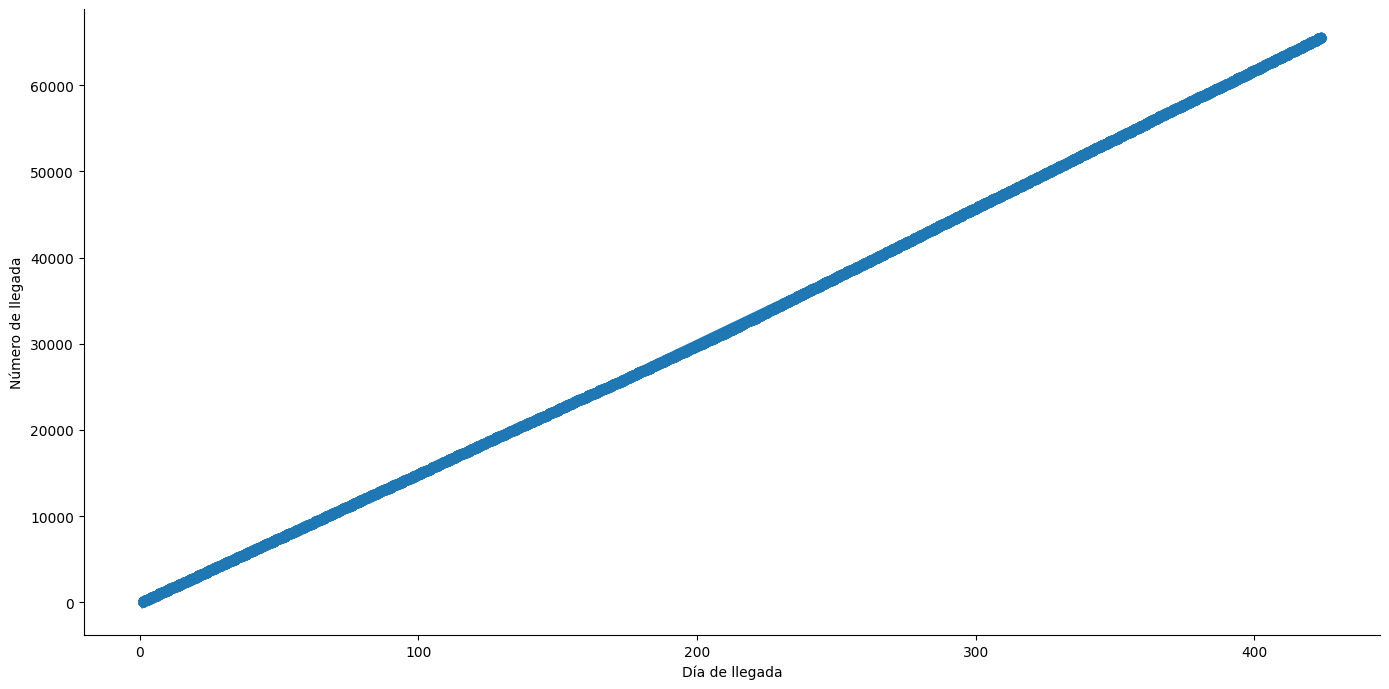

In [22]:
sns.lmplot(x='Día de llegada', y='Número de llegada', data=Info_sheet, height = 7, aspect = 2)

**Pregunta 2**

¿Cuál de las siguientes alternativas corresponde al comando para construir una matriz que relaciona el promedio de días de estadía por GRD con los Servicios de Salud?


Info_sheet[["Hospital al que llega","GRD","Estadia"]].groupby(['Hospital al que llega']).mean()


Info_sheet[["Hospital al que llega","GRD","Estadia"]].groupby(['GRD']).mean()


Info_sheet[["Hospital al que llega","GRD","Estadia"]].groupby(['Hospital al que llega', 'GRD']).sum()


Info_sheet[["Hospital al que llega","GRD","Estadia"]].groupby(['Hospital al que llega', 'GRD']).mean()



In [23]:
Info_sheet[["Hospital al que llega","GRD","Estadia"]].groupby(['Hospital al que llega', 'GRD']).mean()

Estadia
Hospital al que llega                        GRD           
Complejo Hospitalario Dr. Sótero del Río     GRD1      10.0
                                             GRD10     10.0
                                             GRD2       4.0
                                             GRD3       3.0
                                             GRD4       6.0
...                                                     ...
Instituto de Neurocirugía Dr. Alfonso Asenjo GRD5       4.0
                                             GRD6       5.0
                                             GRD7       4.0
                                             GRD8       4.0
                                             GRD9       5.0

[210 rows x 1 columns]